In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
# # metadata 
# print(parkinsons_telemonitoring.metadata) 
  
# # variable information 
# print(parkinsons_telemonitoring.variables) 


In [3]:
X.head()

age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   
3     0.00573  0.02309        0.327       0.01106       0.01265   
4     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006   
1        0.01689      0.02982  0.011112  27.183  0.43493  0.56477  0.10810   
2        0.01458      0.02202  0.020220  23.047  0.46222  0.54405  0.21014   
3        0.01963      0.03317  0.027837  24.445  0.48730  0.57794  0.33277   
4        0.01819      0.02036  0.011625  26.126  0.47188  0.56122  0.19361   

   sex  
0    0  
1    0  
2    0  
3    0  
4    0

In [4]:
y.head()

motor_UPDRS  total_UPDRS
0       28.199       34.398
1       28.447       34.894
2       28.695       35.389
3       28.905       35.810
4       29.187       36.375

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

<Axes: >

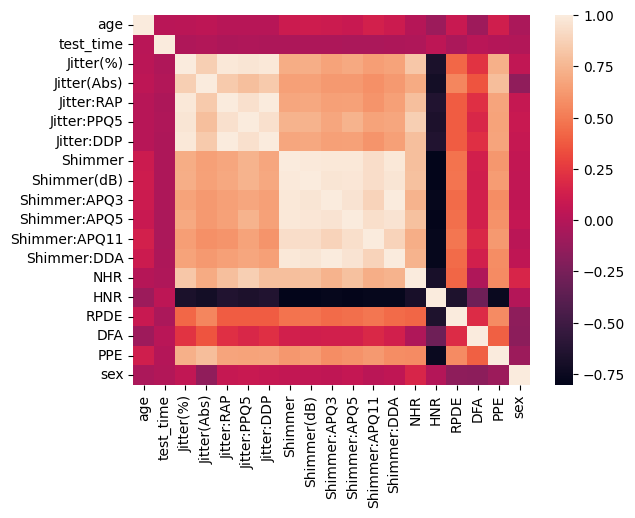

In [21]:
sns.heatmap(X.corr())

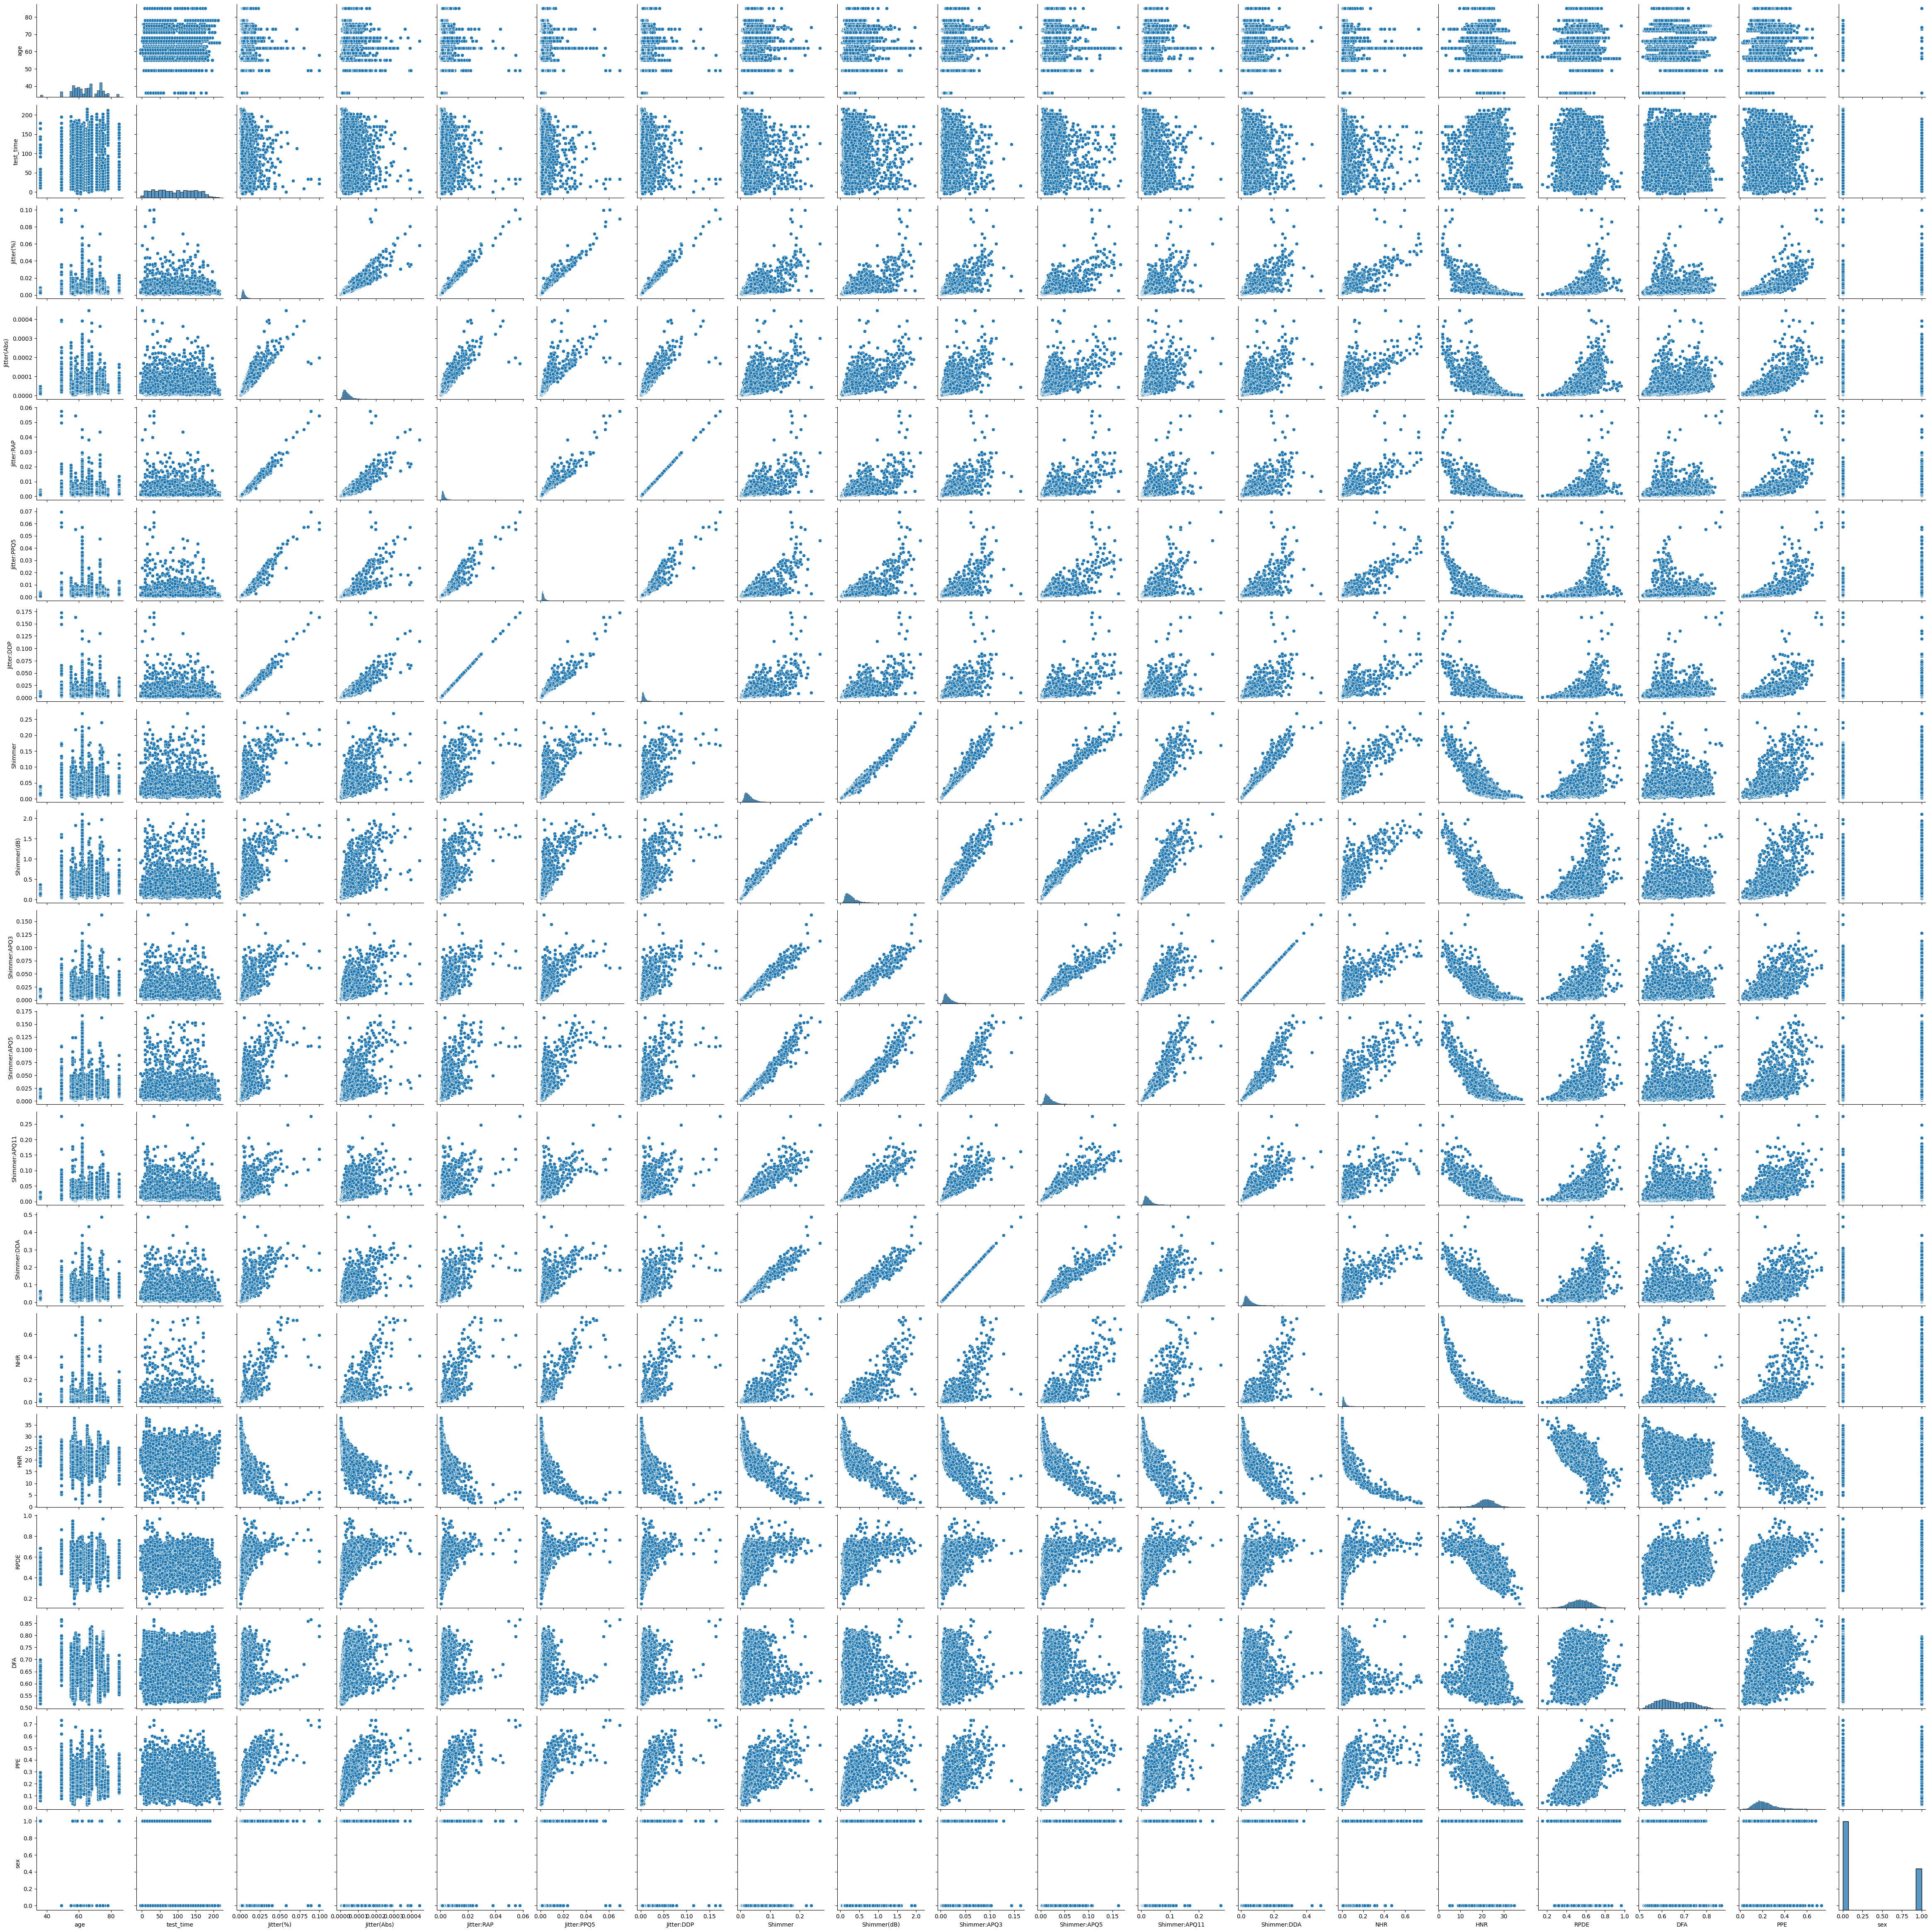

In [20]:
sns.pairplot(X)

In [15]:
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test   
    

In [17]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_seed = 42)